In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
import io
%cd "C:\Users\Neha singh\Desktop\datasets"

C:\Users\Neha singh\Desktop\datasets


In [67]:
climate=pd.read_csv('climate-risk-index-1.csv')

In [68]:
climate.shape

(182, 17)

In [69]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

In [70]:
climate.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [71]:
climate.isnull().sum().sort_values(ascending=False)

the_geom                     182
the_geom_webmercator         182
losses_per_gdp__total         51
rw_country_name                3
rw_country_code                3
fatalities_total               0
losses_usdm_ppp_total          0
losses_usdm_ppp_rank           0
losses_per_gdp__rank           0
index                          0
fatalities_rank                0
cartodb_id                     0
fatalities_per_100k_rank       0
cri_score                      0
cri_rank                       0
country                        0
fatalities_per_100k_total      0
dtype: int64

In [72]:
climate=climate.drop(['the_geom','the_geom_webmercator'],axis=1)

In [73]:
climate.columns

Index(['index', 'cartodb_id', 'country', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_code', 'rw_country_name'],
      dtype='object')

In [74]:
climate.isnull().sum().sort_values(ascending=False)

losses_per_gdp__total        51
rw_country_code               3
rw_country_name               3
index                         0
cartodb_id                    0
country                       0
cri_rank                      0
cri_score                     0
fatalities_per_100k_rank      0
fatalities_per_100k_total     0
fatalities_rank               0
fatalities_total              0
losses_per_gdp__rank          0
losses_usdm_ppp_rank          0
losses_usdm_ppp_total         0
dtype: int64

In [75]:
(climate.isnull().sum().sort_values(ascending=False))/climate.shape[0]

losses_per_gdp__total        0.280220
rw_country_code              0.016484
rw_country_name              0.016484
index                        0.000000
cartodb_id                   0.000000
country                      0.000000
cri_rank                     0.000000
cri_score                    0.000000
fatalities_per_100k_rank     0.000000
fatalities_per_100k_total    0.000000
fatalities_rank              0.000000
fatalities_total             0.000000
losses_per_gdp__rank         0.000000
losses_usdm_ppp_rank         0.000000
losses_usdm_ppp_total        0.000000
dtype: float64

In [76]:
climate.losses_per_gdp__total.describe()

count    131.000000
mean       1.517654
std        8.171267
min        0.000100
25%        0.016500
50%        0.084100
75%        0.275950
max       77.369400
Name: losses_per_gdp__total, dtype: float64

In [77]:
climate.rw_country_code=climate.rw_country_code.fillna("NotAvailable")

In [78]:
climate.rw_country_name=climate.rw_country_name.fillna("NotAvailable")

In [79]:
climate.losses_per_gdp__total=climate.losses_per_gdp__total.fillna(
climate.losses_per_gdp__total.value_counts().idxmax())

In [80]:
climate.columns

Index(['index', 'cartodb_id', 'country', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_code', 'rw_country_name'],
      dtype='object')

In [81]:
climate.fatalities_per_100k_total.describe()

count    182.000000
mean       0.519670
std        3.393934
min        0.000000
25%        0.000000
50%        0.020000
75%        0.120000
max       43.660000
Name: fatalities_per_100k_total, dtype: float64

In [82]:
climate.cri_score.describe()

count    182.000000
mean      81.791923
std       34.582412
min       12.170000
25%       52.872500
50%       77.500000
75%      124.500000
max      124.500000
Name: cri_score, dtype: float64

In [83]:
numericcols=climate.select_dtypes(include=np.number)

In [84]:
numericcols.columns

Index(['index', 'cartodb_id', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total'],
      dtype='object')

In [94]:
numericcols.drop(['index', 'cartodb_id','cri_score'],axis=1).corr()

,cri_rank,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
cri_rank,1.000000,0.833210,-0.246836,0.797387,-0.299047,0.855257,-0.217857,0.814721,-0.273320
fatalities_per_100k_rank,0.833210,1.000000,-0.290038,0.832027,-0.295520,0.513768,-0.195634,0.438988,-0.125780
fatalities_per_100k_total,-0.246836,-0.290038,1.000000,-0.154809,0.067906,-0.212471,0.834489,-0.121545,-0.009246
fatalities_rank,0.797387,0.832027,-0.154809,1.000000,-0.377154,0.426958,-0.053213,0.612183,-0.309275
fatalities_total,-0.299047,-0.295520,0.067906,-0.377154,1.000000,-0.135999,-0.018542,-0.270063,0.602925
losses_per_gdp__rank,0.855257,0.513768,-0.212471,0.426958,-0.135999,1.000000,-0.283096,0.796458,-0.208939
losses_per_gdp__total,-0.217857,-0.195634,0.834489,-0.053213,-0.018542,-0.283096,1.000000,-0.114211,-0.012275
losses_usdm_ppp_rank,0.814721,0.438988,-0.121545,0.612183,-0.270063,0.796458,-0.114211,1.000000,-0.350230
losses_usdm_ppp_total,-0.273320,-0.125780,-0.009246,-0.309275,0.602925,-0.208939,-0.012275,-0.350230,1.000000


In [87]:
import seaborn as sns

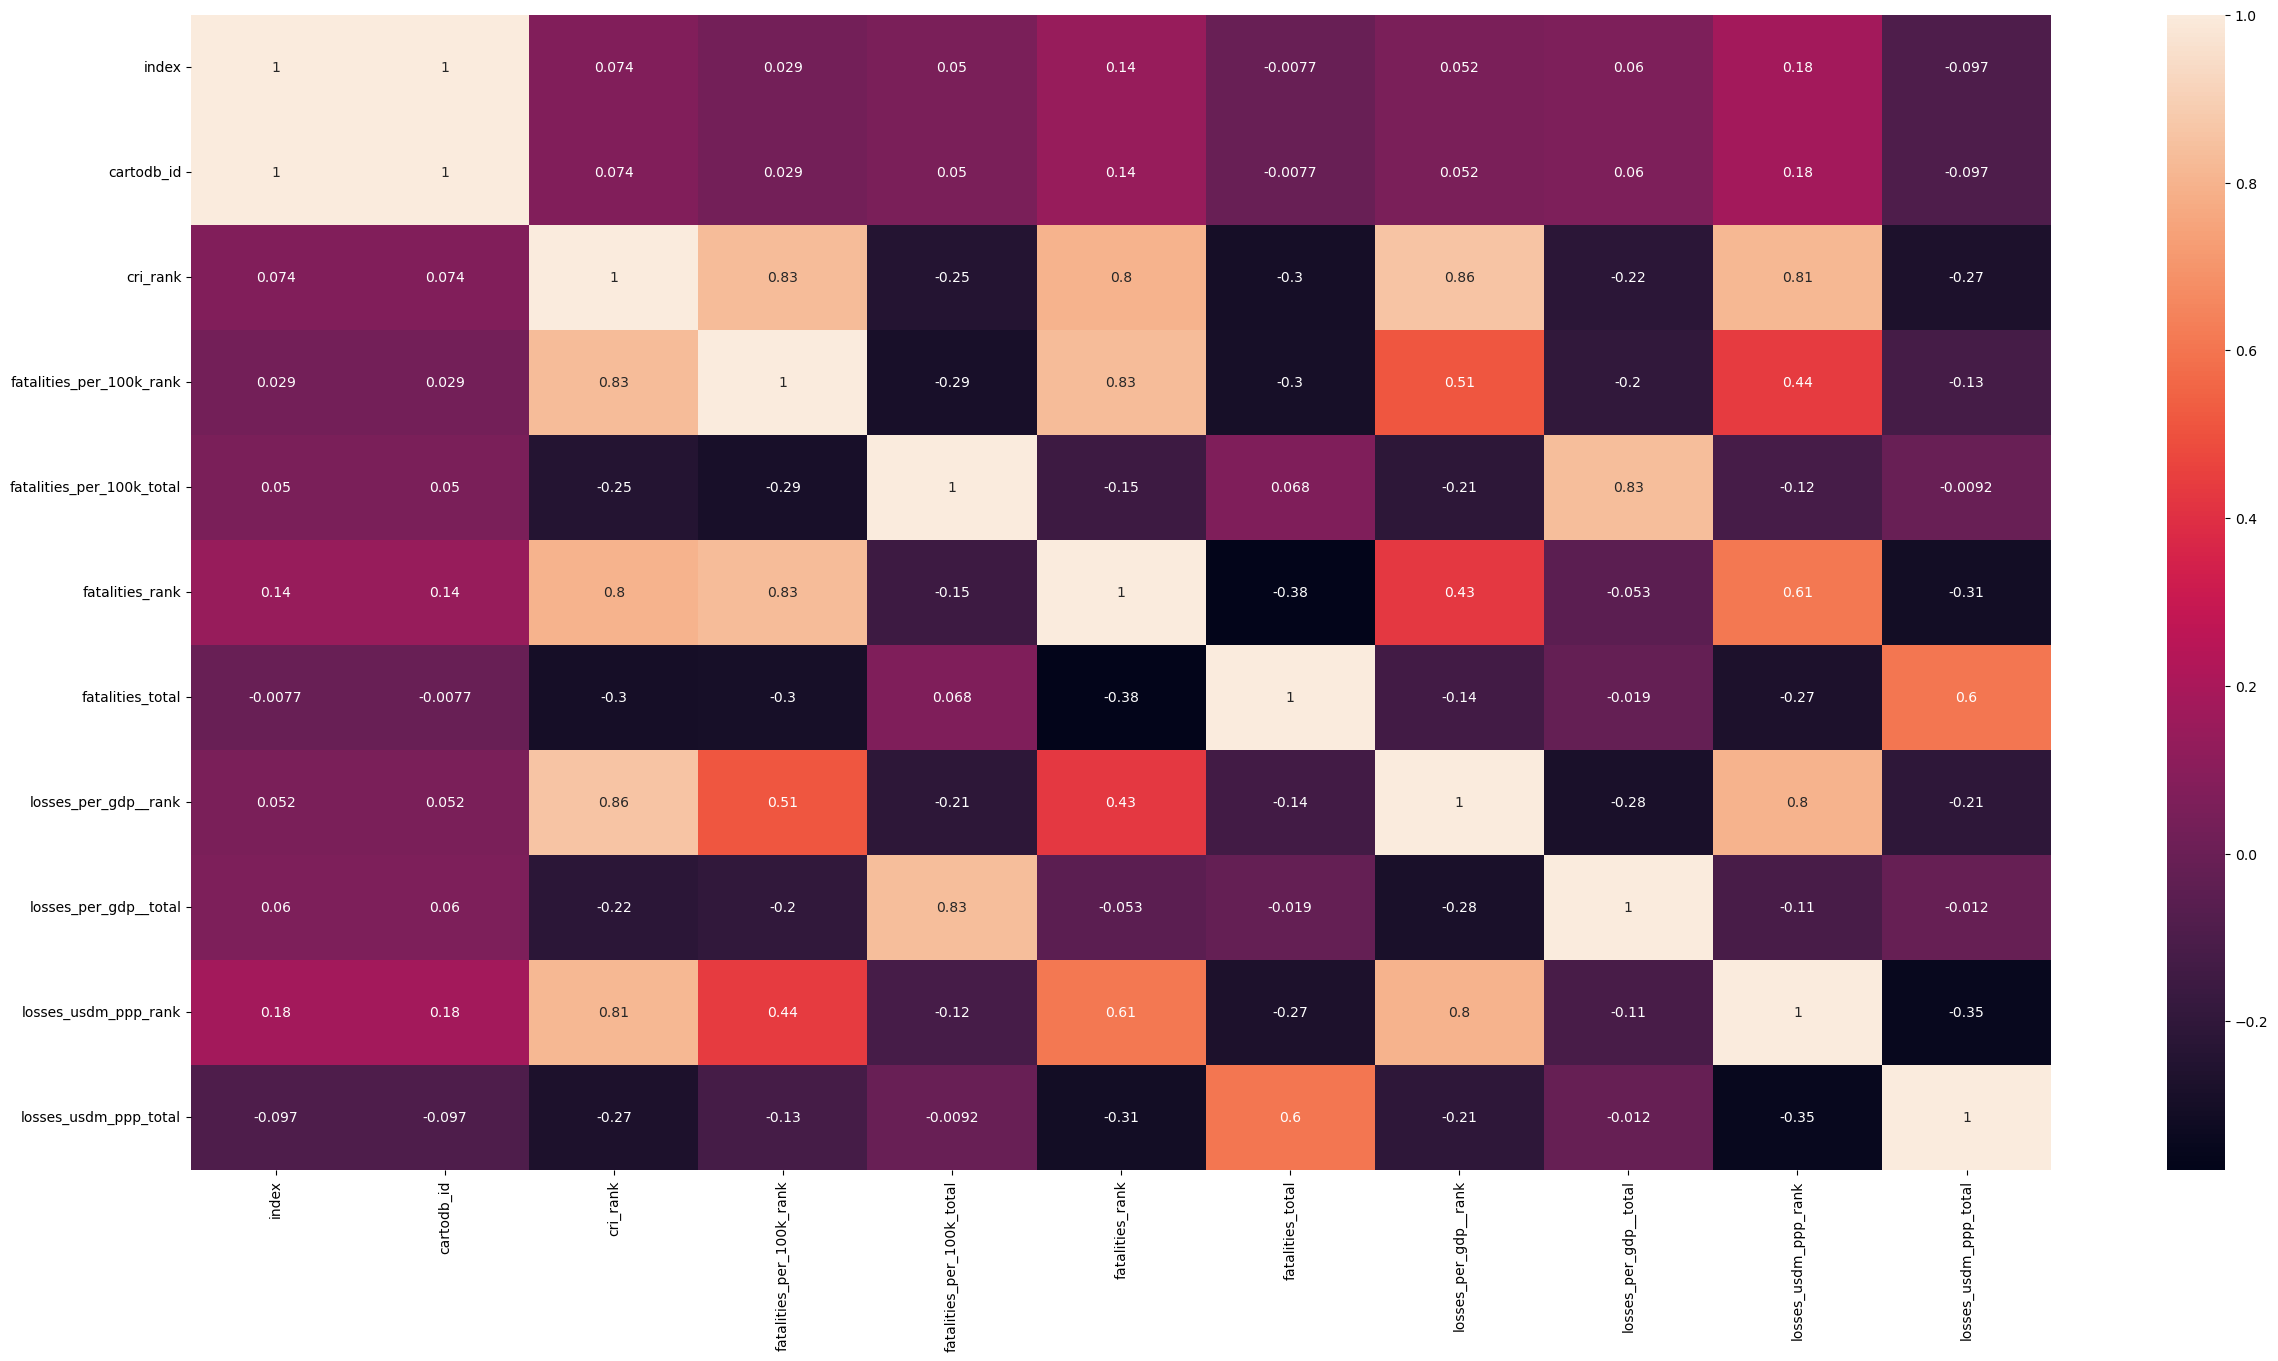

In [95]:
plt.figure(figsize=(30,15))
sns.heatmap(numericcols.drop('cri_score',axis=1).corr(),annot=True)
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler=StandardScaler()

In [98]:
numericcols_scaled=scaler.fit_transform(numericcols.drop('cri_score',axis=1))

In [100]:
numericcols.columns

Index(['index', 'cartodb_id', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total'],
      dtype='object')

In [102]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols.columns[0:11])

In [103]:
numericcols_scaled=numericcols_scaled.reset_index()

In [104]:
combinedf_clean=pd.concat([numericcols_scaled],axis=1)

In [105]:
numericcols=numericcols.reset_index()

In [106]:
combinedf_clean['cri_score']=numericcols.cri_score

In [107]:
# split data into y & x 
y=climate.cri_score
x=climate.drop(['index', 'cartodb_id','cri_score'],axis=1)

In [108]:
y.dtype

dtype('float64')

In [109]:
y=y.astype('int64')

<AxesSubplot: ylabel='Frequency'>

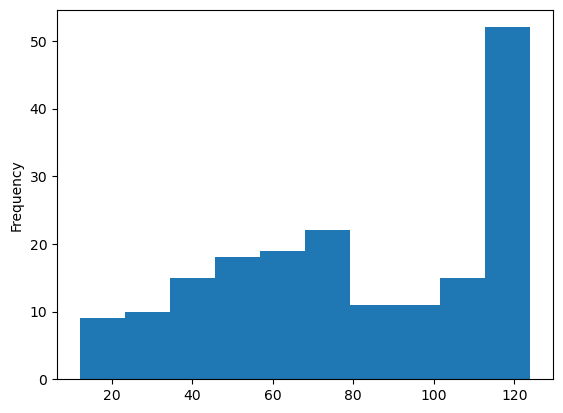

In [110]:
y.plot(kind='hist')